### Connect to Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import libraries

In [2]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=16) 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import warnings
import logging
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import AdaBoostRegressor




tfk = tf.keras
tfkl = tf.keras.layers

### Set seed for reproducibility

In [3]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

### Load data

#### For work

In [ ]:
x_train = np.load('/content/drive/MyDrive/x_train.npy')
y_train = np.load('/content/drive/MyDrive/y_train.npy')

#### For edu

In [4]:
x_train = np.load('/content/drive/MyDrive/Colab/AN2DL/ANN2DL_HW2_Shared/original_data/x_train.npy')
y_train = np.load('/content/drive/MyDrive/Colab/AN2DL/ANN2DL_HW2_Shared/original_data/y_train.npy')

In [5]:
label_mapping = {
    "Wish",
    "Another",
    "Comfortably",
    "Money",
    "Breathe",
    "Time",
    "Brain",
    "Echoes",
    "Wearing",
    "Sorrow",
    "Hey",
    "Shine"
}

### Preprocessing

#### Class weights

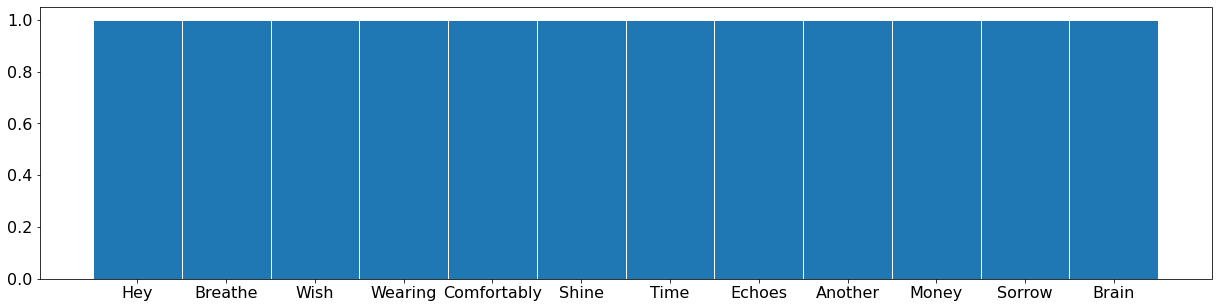

In [ ]:
class_weights = compute_class_weight(class_weight='balanced', classes=list(np.unique(y_train)), y=y_train)

fig = plt.figure(figsize=(21, 5))
plt.bar(np.arange(12), class_weights, width=1, edgecolor="white", tick_label=list(label_mapping))
plt.show()

In [ ]:
class_weights = dict(zip(np.arange(12), class_weights))
class_weights

{0: 1.0,
 1: 1.0,
 2: 1.0,
 3: 1.0,
 4: 1.0,
 5: 1.0,
 6: 1.0,
 7: 1.0,
 8: 1.0,
 9: 1.0,
 10: 1.0,
 11: 1.0}

#### Scaling after splitting

In [6]:
X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [7]:
train_data = np.concatenate([x for x in X_train]) 
scaler = StandardScaler().fit(train_data)

X_train_trans = [] 
for el in X_train: 
  X_train_trans.append(scaler.transform(el))
del X_train 

X_val_trans = [] 
for el in X_val: 
  X_val_trans.append(scaler.transform(el))
del X_val 
# all set

X_train = np.asarray(X_train_trans) 
X_val = np.asarray(X_val_trans) 

In [8]:
# Convert the sparse labels to categorical values
y_train = tfk.utils.to_categorical(y_train)
y_val = tfk.utils.to_categorical(y_val)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((1943, 36, 6), (1943, 12), (486, 36, 6), (486, 12))

In [ ]:
scaler.mean_

array([ 9.44224338, 17.56261897, 23.66422228, 29.65369717, 31.94833673,
       29.33139805])

In [ ]:
scaler.var_

array([ 74243.72342966, 625660.19674941, 481688.93695833, 407579.61161962,
       406657.39358041, 515684.76013709])

In [ ]:
scaler.scale_

array([272.4770145 , 790.98684992, 694.03813797, 638.41962033,
       637.69694494, 718.11194123])

In [ ]:
scaler.n_features_in_

6

In [ ]:
scaler.n_samples_seen_

69948

In [ ]:
scaler.with_mean

True

In [ ]:
scaler.with_std

True

In [ ]:
scaler.copy

True

#### Oversampling

In [9]:
ros = RandomOverSampler(random_state=seed)

X1 = []

for dim in range(X_train.shape[2]):
  X_dim = X_train[:,:,dim]
  X1.append(X_dim)

X1 = np.concatenate(X1, axis=1)
X_ros, y_ros = ros.fit_resample(X1, y_train)
X_ros = np.reshape(X_ros, (X_ros.shape[0], 36, 6), order='F')
X_ros.shape, y_ros.shape

((7476, 36, 6), (7476, 12))

In [10]:
X_train = X_ros
y_train = y_ros

In [ ]:
fig = plt.figure(figsize=(21, 5))
plt.bar(np.arange(12), np.argmax(y_ros), width=1, edgecolor="white", tick_label=list(label_mapping))
plt.show()

#### Undersampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=seed)

X1 = []

for dim in range(X_train.shape[2]):
  X_dim = X_train[:,:,dim]
  X1.append(X_dim)

X1 = np.concatenate(X1, axis=1)
X_ros, y_ros = ros.fit_resample(X1, y_train)
X_ros = np.reshape(X_ros, (X_ros.shape[0], 36, 6), order='F')
X_ros.shape, y_ros.shape

((7476, 36, 6), (7476, 12))

In [ ]:
X_train = X_ros
y_train = y_ros

#### For final training

In [ ]:
# scaling after splitting
X_train = x_train

In [ ]:
train_data = np.concatenate([x for x in X_train]) 
scaler = StandardScaler().fit(train_data)

X_train_trans = [] 
for el in X_train: 
  X_train_trans.append(scaler.transform(el))
del X_train 

X_train = np.asarray(X_train_trans) 

In [ ]:
# Convert the sparse labels to categorical values
y_train = tfk.utils.to_categorical(y_train)
X_train.shape, y_train.shape

In [ ]:
# oversampling
ros = RandomOverSampler(random_state=seed)

X1 = []

for dim in range(X_train.shape[2]):
  X_dim = X_train[:,:,dim]
  X1.append(X_dim)

X1 = np.concatenate(X1, axis=1)
X_ros, y_ros = ros.fit_resample(X1, y_train)
X_ros = np.reshape(X_ros, (X_ros.shape[0], 36, 6), order='F')
X_ros.shape, y_ros.shape

In [ ]:
X_train = X_ros
y_train = y_ros

### Build and train models

In [11]:
input_shape = X_train.shape[1:] # 36,6
batch_size = 128
epochs = 100

### 1D Convolutional Neural Network



In [12]:
def build_1DCNN_classifier(input_shape):
    # Build the neural network layer by layer

    input_layer = tfkl.Input(shape=input_shape, name='Input')
    cnn = tfkl.Conv1D(300,3,padding='same',activation='relu')(input_layer) # we will have the same samples in the next layer, we dont loose the temporality
    cnn = tfkl.Conv1D(300,3,padding='same',activation='relu')(cnn)
    cnn = tfkl.MaxPooling1D()(cnn)
    cnn = tfkl.Conv1D(300,3,padding='same',activation='relu')(cnn)
    cnn = tfkl.Conv1D(300,3,padding='same',activation='relu')(cnn)
    cnn = tfkl.MaxPooling1D()(cnn)
    dropout = tfkl.Dropout(.4, seed=seed)(cnn)
    cnn = tfkl.Conv1D(300,3,padding='same',activation='relu')(dropout)
    cnn = tfkl.Conv1D(300,3,padding='same',activation='relu')(cnn)
    cnn = tfkl.MaxPooling1D()(cnn)
    cnn = tfkl.Conv1D(300,3,padding='same',activation='relu')(cnn)
    cnn = tfkl.Conv1D(300,3,padding='same',activation='relu')(cnn)
    cnn = tfkl.MaxPooling1D()(cnn)
    dropout2 = tfkl.Dropout(.4, seed=seed)(cnn)

    att = tf.keras.layers.MultiHeadAttention(num_heads=18, key_dim=36)(input_layer, dropout2)

    gap = tfkl.GlobalAveragePooling1D()(att)

    # Classifier
    classifier = tfkl.Dense(300, activation='relu', kernel_regularizer=tfk.regularizers.L1L2(l1=1e-4, l2=1e-3))(gap)
    dropout = tfkl.Dropout(.4, seed=seed)(classifier)
    output_layer = tfkl.Dense(12, activation='softmax')(dropout)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model

#### Train

In [13]:
model = build_1DCNN_classifier(input_shape)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input (InputLayer)             [(None, 36, 6)]      0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 36, 300)      5700        ['Input[0][0]']                  
                                                                                                  
 conv1d_1 (Conv1D)              (None, 36, 300)      270300      ['conv1d[0][0]']                 
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 18, 300)      0           ['conv1d_1[0][0]']               
                                                                                              

In [14]:
# Train the model
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data=(X_val, y_val),
    #class_weight=class_weights,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', patience=150, mode='max', restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/100
59/59 [==============================] - 12s 40ms/step - loss: 2.3158 - accuracy: 0.1667 - val_loss: 2.2717 - val_accuracy: 0.1317 - lr: 0.0010
Epoch 2/100
59/59 [==============================] - 1s 22ms/step - loss: 2.0224 - accuracy: 0.2508 - val_loss: 2.1779 - val_accuracy: 0.1502 - lr: 0.0010
Epoch 3/100
59/59 [==============================] - 1s 22ms/step - loss: 1.6893 - accuracy: 0.3711 - val_loss: 2.0104 - val_accuracy: 0.2551 - lr: 0.0010
Epoch 4/100
59/59 [==============================] - 1s 20ms/step - loss: 1.6087 - accuracy: 0.4177 - val_loss: 1.8156 - val_accuracy: 0.2551 - lr: 0.0010
Epoch 5/100
59/59 [==============================] - 1s 20ms/step - loss: 1.5189 - accuracy: 0.4255 - val_loss: 1.8333 - val_accuracy: 0.3498 - lr: 0.0010
Epoch 6/100
59/59 [==============================] - 1s 19ms/step - loss: 1.3268 - accuracy: 0.5072 - val_loss: 1.6736 - val_accuracy: 0.4342 - lr: 0.0010
Epoch 7/100
59/59 [==============================] - 1s 20ms/step - l

In [15]:
best_score = max(history['accuracy'])
best_score_val = max(history['val_accuracy'])

print("Max train accuracy obtained with this model:", best_score)
print("Max val accuracy obtained with this model:", best_score_val)

Max train accuracy obtained with this model: 1.0
Max val accuracy obtained with this model: 0.7386831045150757


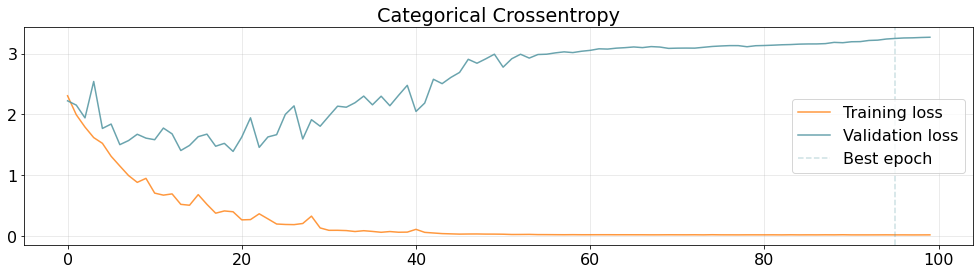

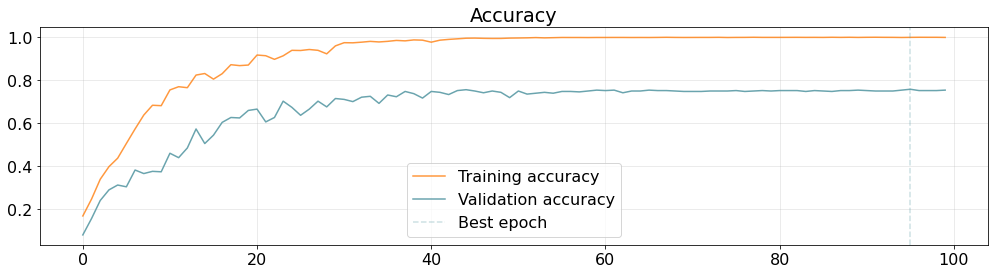

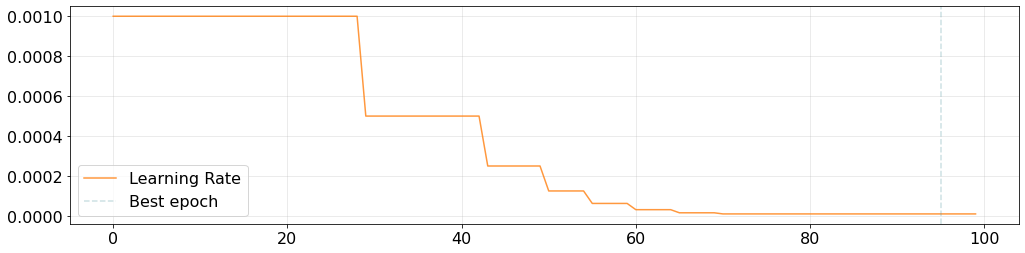

In [ ]:
best_epoch = np.argmax(history['val_accuracy'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Categorical Crossentropy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['accuracy'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.plot(history['val_accuracy'], label='Validation accuracy', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/saved_models')
# model = tfk.models.load_model('LSTM')

In [ ]:
# Predict the test set with the LSTM
predictions = model.predict(X_val)
predictions.shape

16/16 [==============================] - 1s 13ms/step


(486, 12)

Accuracy: 0.7469
Precision: 0.6509
Recall: 0.6493
F1: 0.6362


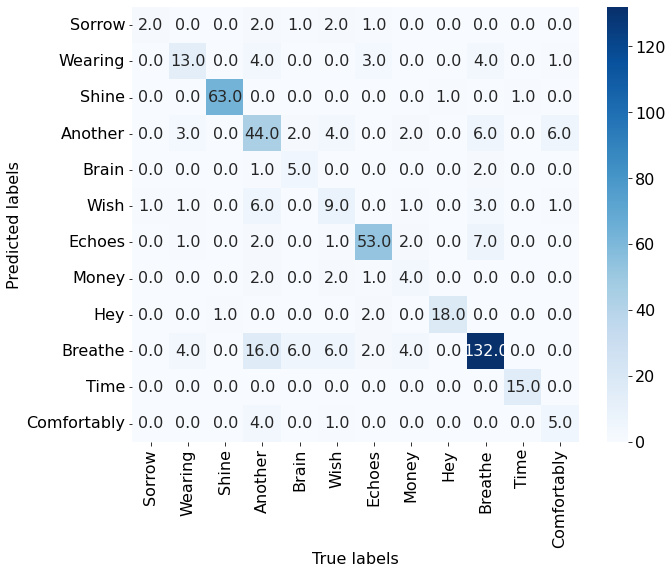

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(np.argmax(y_val, axis=-1), np.argmax(predictions, axis=-1))

# Compute the classification metrics
accuracy = accuracy_score(np.argmax(y_val, axis=-1), np.argmax(predictions, axis=-1))
precision = precision_score(np.argmax(y_val, axis=-1), np.argmax(predictions, axis=-1), average='macro')
recall = recall_score(np.argmax(y_val, axis=-1), np.argmax(predictions, axis=-1), average='macro')
f1 = f1_score(np.argmax(y_val, axis=-1), np.argmax(predictions, axis=-1), average='macro')
print('Accuracy:',accuracy.round(4))
print('Precision:',precision.round(4))
print('Recall:',recall.round(4))
print('F1:',f1.round(4))

# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm.T, cmap='Blues', xticklabels=list(label_mapping), yticklabels=list(label_mapping), annot=True, fmt = '.1f')
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

In [ ]:
class_weights

{0: 5.953431372549019,
 1: 1.6456639566395663,
 2: 0.7496913580246913,
 3: 0.5312773403324584,
 4: 3.264784946236559,
 5: 1.3229847494553377,
 6: 0.6466986155484558,
 7: 2.9767156862745097,
 8: 1.6868055555555554,
 9: 0.2605105105105105,
 10: 2.628787878787879,
 11: 3.968954248366013}

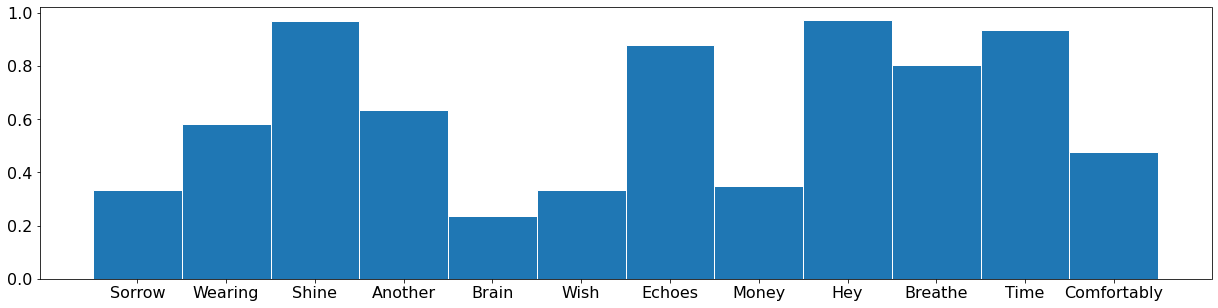

In [ ]:
f1s = f1_score(np.argmax(y_val, axis=-1), np.argmax(predictions, axis=-1), average=None)

fig = plt.figure(figsize=(21, 5))
plt.bar(np.arange(12), f1s, width=1, edgecolor="white", tick_label=list(label_mapping))

plt.show()